## 问题说明

- 随机性的处理
    - 某个函数的用时，符合一定范围内的均匀波动：mean-stdev, mean+stdev
    - 不稳定的case，更具有随机性，所以可能符合正态分布，或者均匀分布拥有更大的stdev
- 非随机性的处理
    - 利用新算法来处理

In [108]:
import statistics
import numpy as np
import pandas as pd

def calc_unstable_factor(values):
    unstable_factor = np.NaN
    for i in range(len(values)):
        pre_half = values[0 : i]
        lst_half = values[i : len(values)]
        
        pre_half_factor = statistics.stdev(pre_half) / statistics.mean(pre_half) if len(pre_half) > 1 else 0.0
        lst_half_factor = statistics.stdev(lst_half) / statistics.mean(lst_half) if len(lst_half) > 1 else 0.0
        factor = pre_half_factor + lst_half_factor
        #print("pre={}, lst={}, factor={}".format(pre_half_factor, lst_half_factor, factor))

        if pd.isnull(unstable_factor) or unstable_factor > factor:
            unstable_factor = factor
    print(unstable_factor)
    return unstable_factor

def calc_cv(values):
    return statistics.stdev(values) / statistics.mean(values)

arr = [13.21, 13.63, 13.20, 6.06, 6.14, 6.20]
calc_unstable_factor(arr)
print(calc_cv(arr))

0.029840269219986133
0.40597564962755806


## 现实数据的例子

不稳定

mean of dataset: 113.185
stdev of dataset: 20.931569081426417
          uf        cv
0   0.000000       NaN
1   0.000000  0.010477
2   0.010314  0.010314
3   0.009975  0.009975
4   0.009975  0.014521
5   0.012043  0.016255
6   0.016225  0.016325
7   0.018253  0.018523
8   0.018679  0.111771
9   0.110285  0.110285
10  0.110851  0.110851
11  0.109017  0.109017
12  0.119515  0.229062
13  0.229390  0.229390
14  0.235308  0.235308
15  0.237270  0.237270
16  0.251246  0.266820
17  0.242155  0.263849
18  0.227604  0.227604
19  0.227213  0.227213


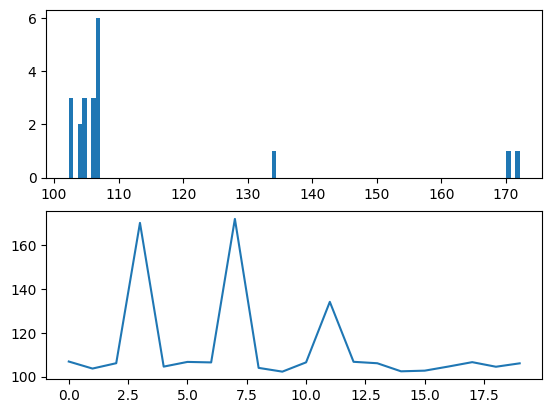

In [50]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

arr = [106.90, 103.68, 106.13, 170.30, 104.57, 106.72, 106.49, 172.12, 103.99, 102.27, 106.52, 134.19, 106.77, 106.11, 102.42, 102.72, 104.61, 106.61, 104.51, 106.07]
print('mean of dataset: {}'.format(statistics.mean(arr)))
print('stdev of dataset: {}'.format(statistics.stdev(arr)))

var = pd.DataFrame()
var['uf'] = pd.Series(reversed(arr)).rolling(6, min_periods=1).apply(calc_unstable_factor)
var['cv'] = pd.Series(reversed(arr)).rolling(6, min_periods=2).apply(calc_cv)
print(var)

calc_cv
fig, axes = plt.subplots(2, 1)
axes[0].hist(arr, bins=100, density=False)
axes[1].plot(arr)

偶尔不稳定：毛刺

mean of dataset: 106.73777777777778
stdev of dataset: 7.032795072796285
          uf        cv
0   0.000000       NaN
1   0.000000  0.010477
2   0.010314  0.010314
3   0.009975  0.009975
4   0.009975  0.014521
5   0.012043  0.016255
6   0.016225  0.016325
7   0.018253  0.018523
8   0.018679  0.111771
9   0.110285  0.110285
10  0.110851  0.110851
11  0.109017  0.109017
12  0.108741  0.108741
13  0.018872  0.108774
14  0.017072  0.017072
15  0.011579  0.016551
16  0.011579  0.012736
17  0.012426  0.012426


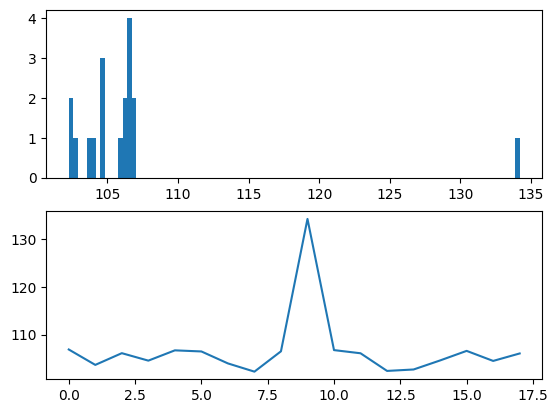

In [54]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

arr = [106.90, 103.68, 106.13, 104.57, 106.72, 106.49, 103.99, 102.27, 106.52, 134.19, 106.77, 106.11, 102.42, 102.72, 104.61, 106.61, 104.51, 106.07]
print('mean of dataset: {}'.format(statistics.mean(arr)))
print('stdev of dataset: {}'.format(statistics.stdev(arr)))

#test_data = [102.27, 106.52, 134.19, 106.77, 106.11, 102.42]
#calc_unstable_factor(test_data)

var = pd.DataFrame()
var['uf'] = pd.Series(reversed(arr)).rolling(6, min_periods=1).apply(calc_unstable_factor)
var['cv'] = pd.Series(reversed(arr)).rolling(6, min_periods=2).apply(calc_cv)
print(var)

fig, axes = plt.subplots(2, 1)
axes[0].hist(arr, bins=100, density=False)
axes[1].plot(arr)

跳变。代码修改的跳变比较轻微，不能直接用unstable factor来评估，这里唯一可以防止的是那种比较大的跳变。总结一下就是：

- 代码修改的轻微跳变，得到的CV/UF都很小（小于0.1），此时主要由数据列本身的数据趋势来判定
- 代码修改带来的大幅跳变，得到的CV大，UF小，此时还是主要由数据列本身的数据趋势来判定

mean of dataset[0,20]: 54.0195
stdev of dataset[0,20]: 3.3486312600508095
mean of dataset[0,7]: 58.315714285714286
stdev of dataset[0,7]: 0.3198362676358592
mean of dataset[7,20]: 51.706153846153846
stdev of dataset[7,20]: 1.067196783334252
          uf        cv
0   0.000000       NaN
1   0.000000  0.004363
2   0.001854  0.003097
3   0.003097  0.020246
4   0.005580  0.023225
5   0.006231  0.024165
6   0.004834  0.021684
7   0.010009  0.021444
8   0.009216  0.009216
9   0.008932  0.008932
10  0.009417  0.009417
11  0.009678  0.009678
12  0.002067  0.009977
13  0.002067  0.055906
14  0.006955  0.067192
15  0.005366  0.068412
16  0.005281  0.062872
17  0.004581  0.048963
18  0.004581  0.004937
19  0.004786  0.005717


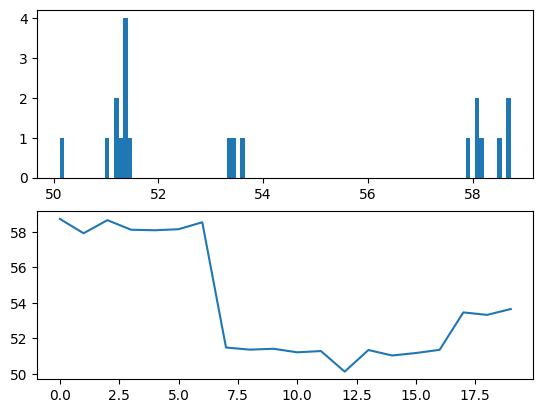

In [38]:
import statistics
import numpy as np
import matplotlib.pyplot as plt

arr = [58.73, 57.92, 58.66, 58.12, 58.09, 58.15, 58.54, 51.48, 51.36, 51.41, 51.21, 51.28, 50.12, 51.34, 51.03, 51.17, 51.35, 53.46, 53.32, 53.65]
print('mean of dataset[0,20]: {}'.format(statistics.mean(arr)))
print('stdev of dataset[0,20]: {}'.format(statistics.stdev(arr)))
print('mean of dataset[0,7]: {}'.format(statistics.mean(arr[0:7])))
print('stdev of dataset[0,7]: {}'.format(statistics.stdev(arr[0:7])))
print('mean of dataset[7,20]: {}'.format(statistics.mean(arr[7:])))
print('stdev of dataset[7,20]: {}'.format(statistics.stdev(arr[7:])))

var = pd.DataFrame()
var['uf'] = pd.Series(reversed(arr)).rolling(6, min_periods=1).apply(calc_unstable_factor)
var['cv'] = pd.Series(reversed(arr)).rolling(6, min_periods=2).apply(calc_cv)
print(var)

fig, axes = plt.subplots(2, 1)
axes[0].hist(arr, bins=100, density=False)
axes[1].plot(arr)